In [2]:
import numpy as np
import time
import multiprocessing
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
def multiply_matrices(constant_matrix,result,start,end):
  for i in range(start,end):
    result[i]=np.dot(constant_matrix,np.random.rand(1000,1000))


Time taken with 1 threads: 8.229470252990723 seconds (Expected: 500 seconds)
Time taken with 2 threads: 8.536931276321411 seconds (Expected: 250 seconds)
Time taken with 3 threads: 9.066617965698242 seconds (Expected: 175 seconds)
Time taken with 4 threads: 8.451407194137573 seconds (Expected: 275 seconds)
Time taken with 5 threads: 8.631158113479614 seconds (Expected: 300 seconds)
Time taken with 6 threads: 9.21594762802124 seconds (Expected: 350 seconds)
Time taken with 7 threads: 8.601343154907227 seconds (Expected: 450 seconds)


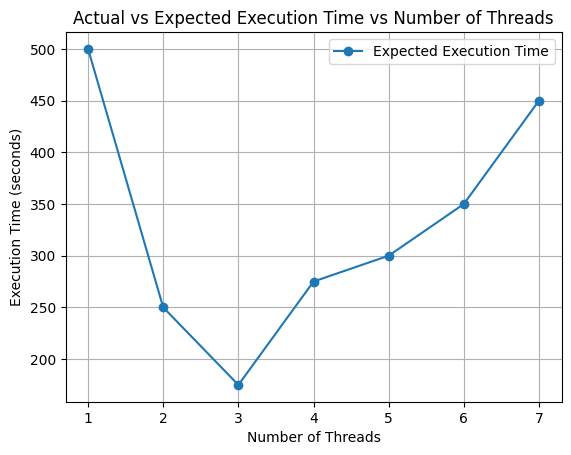

   Threads  Actual Time (s)  Expected Time (s)
0        1         8.229470                500
1        2         8.536931                250
2        3         9.066618                175
3        4         8.451407                275
4        5         8.631158                300
5        6         9.215948                350
6        7         8.601343                450


In [5]:
if __name__ == "__main__":
  constant_matrix=np.random.rand(1000,1000)
  num_matrices=100
  num_threads=[1,2,3,4,5,6,7]
  times=[500,250,175,275,300,350,450]
  actual_execution_times=[]
  expected_execution_times=[]
  cpu_usages=[]
  for t,time_taken in zip(num_threads,times):
    start_time=time.time()

    with multiprocessing.Pool(processes=t) as pool:
      result=[None]*num_matrices
      chunk_size=num_matrices//t
      start_indices = [i * chunk_size for i in range(t)]
      end_indices = [(i + 1) * chunk_size for i in range(t)]
      end_indices[-1] = num_matrices

      pool.starmap(multiply_matrices, [(constant_matrix, result, start, end) for start, end in zip(start_indices, end_indices)])

    end_time = time.time()
    execution_time = end_time - start_time
    actual_execution_times.append(execution_time)
    expected_execution_times.append(time_taken)
    print(f"Time taken with {t} threads: {execution_time} seconds (Expected: {time_taken} seconds)")

    # Record CPU usage
    cpu_usages.append(100 * (execution_time / time_taken))

  # Generate graph for actual vs expected execution time
  #plt.plot(num_threads, actual_execution_times, marker='o', label='Actual Execution Time')
  plt.plot(num_threads, expected_execution_times, linestyle='-', marker='o', label='Expected Execution Time')
  plt.xlabel('Number of Threads')
  plt.ylabel('Execution Time (seconds)')
  plt.title('Actual vs Expected Execution Time vs Number of Threads')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Create a DataFrame for the table
  table_data = {'Threads': num_threads, 'Actual Time (s)': actual_execution_times, 'Expected Time (s)': expected_execution_times}
  df = pd.DataFrame(table_data)
  print(df)